In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd


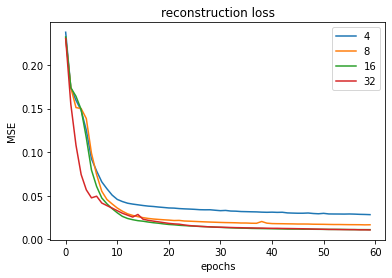

In [56]:
loss_log = []

for i in [4, 8, 16, 32]:
    with open('./visual%d/'%i+'loss_log.npy', 'rb') as f:
        loss_log.append(np.load(f))

# plt.figure(figsize=(10,8))
plt.title('reconstruction loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
i = 2
for log in loss_log:
    i = i*2
    plt.plot(log,label=i)
    plt.legend()

plt.show()

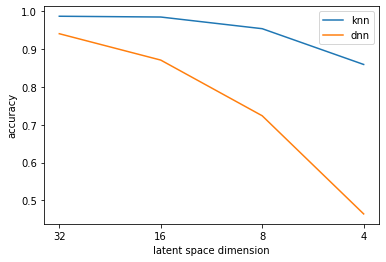

In [69]:
knn = [0.9867235079171742, 0.984652862362972, 0.953836784409257,  0.8593179049939099]
dnn = [0.9405602923264312, 0.8708891595615104, 0.7237515225334957, 0.4644336175395859]

plt.xlabel('latent space dimension')
plt.ylabel('accuracy')
plt.plot(['32','16','8','4'],knn,label='knn')
plt.plot(['32','16','8','4'],dnn,label='dnn')
plt.legend()
plt.show()

In [14]:
folder = './visual2/'
test_latent = None
test_label = None
with open(folder+'test_latent.npy', 'rb') as f:
    test_latent = np.load(f)
with open(folder+'test_label.npy', 'rb') as f:
    test_label = np.load(f)    
print(test_latent.shape)
print(test_label.shape)

(8210, 2)
(8210,)


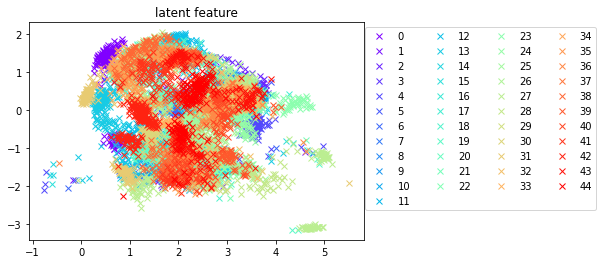

In [30]:
colors = cm.rainbow(np.linspace(0, 1, 45))

data = pd.DataFrame({"x": test_latent[:,0], "y": test_latent[:,1], "label": test_label.astype('int32')})
groups = data.groupby("label")

for i,(name, group) in enumerate(groups):
    plt.plot(group["x"], group["y"], marker="x", linestyle="", label=name, color=colors[i])
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1), ncol=4)
plt.title('latent feature')
plt.show()